In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Standardize the data (optional but recommended)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting purposes
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis=1)

# Explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


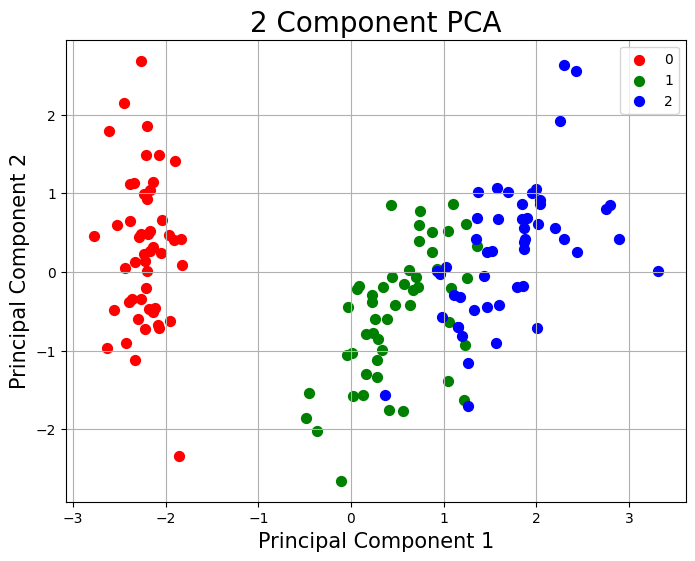

In [4]:
# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['target'] == target
    ax.scatter(final_df.loc[indices_to_keep, 'PC1'],
               final_df.loc[indices_to_keep, 'PC2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

plt.show()


Explained variance ratio: [0.72962445 0.22850762 0.03668922]


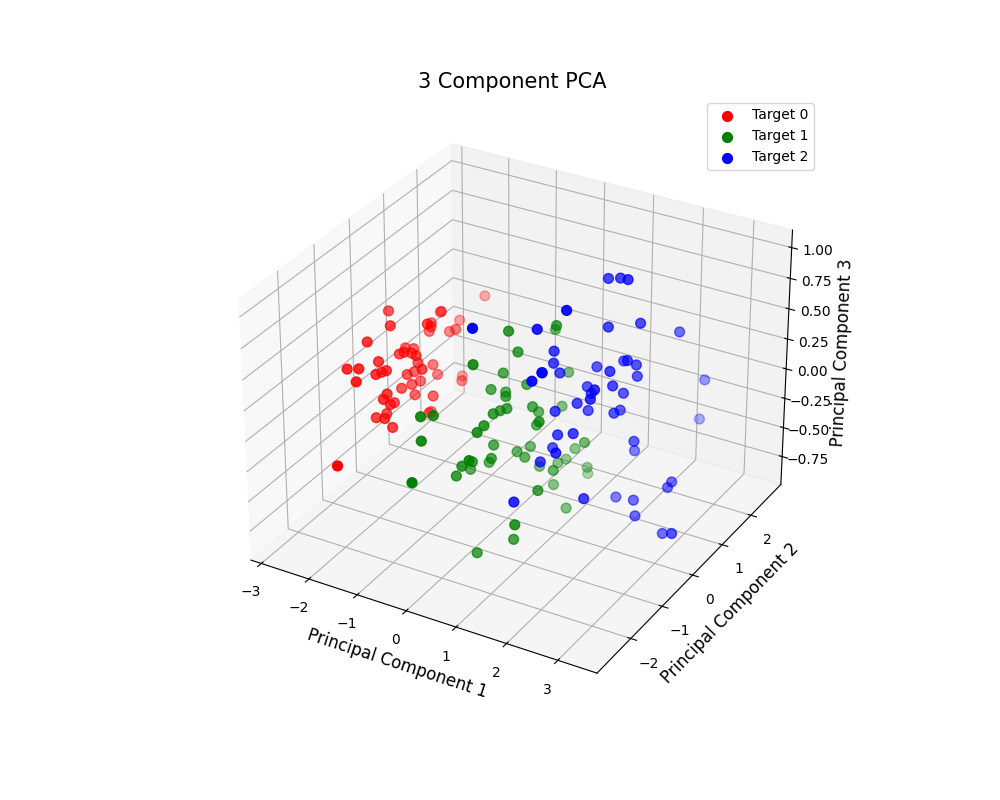

In [5]:
# Activate interactive plot mode for Jupyter Notebook
%matplotlib widget

# Standardize the data (optional but recommended)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting purposes
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis=1)

# Explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3 Component PCA', fontsize=15)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['target'] == target
    ax.scatter(final_df.loc[indices_to_keep, 'PC1'],
               final_df.loc[indices_to_keep, 'PC2'],
               final_df.loc[indices_to_keep, 'PC3'],
               c=color,
               s=50,
               label=f'Target {target}')
ax.legend()
ax.grid()

plt.show()


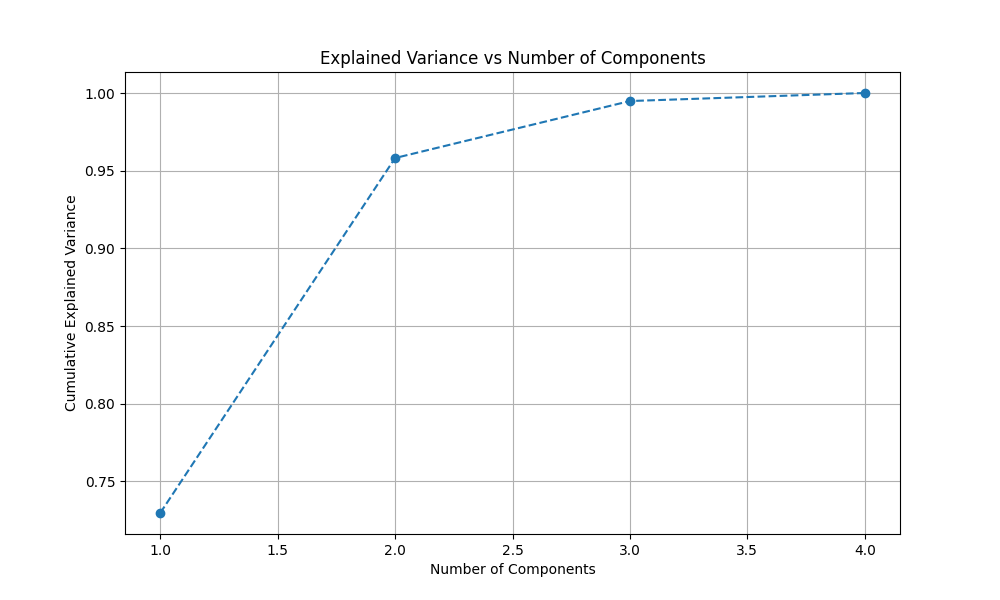

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (optional but recommended)
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
num_components = np.arange(1, len(pca.explained_variance_ratio_) + 1) # include - exclude
plt.plot(num_components, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()
